In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

# Load TF-IDF dataset

In [129]:
df = pd.read_csv('../Data/Processed Dataset TF-IDF Train')

In [130]:
df.insert(31, "Media", np.where((df["Photo Count"] > 0) | (df["Video Count"] > 0) | (df["GIF Count"] > 0), 1, 0))

In [131]:
df.insert(32, "Emotion Score", df["Negative Score"] + df["Positive Score"])

In [132]:
df.iloc[:,:35].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46289 entries, 0 to 46288
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                46289 non-null  int64  
 1   date_x                            46289 non-null  object 
 2   hour of tweet                     46289 non-null  int64  
 3   time of day                       46289 non-null  object 
 4   Early Morning Count               46289 non-null  int64  
 5   Morning Count                     46289 non-null  int64  
 6   Noon Count                        46289 non-null  int64  
 7   Eve Count                         46289 non-null  int64  
 8   Night Count                       46289 non-null  int64  
 9   Late Night Count                  46289 non-null  int64  
 10  user                              46289 non-null  object 
 11  user_followers                    46289 non-null  int64  
 12  Mont

In [133]:
#first three are the outcome variables
#rest are features
#text features from variable 33
useful_list = [24, 25, 26, 11, 12, 15, 17, 22, 23, 28, 29, 30, 31, 33]

In [134]:
df_small = df.iloc[:, useful_list]#.join(df.iloc[:, 33:])

In [135]:
df_small.columns

Index(['likes', 'retweets', 'replies', 'user_followers',
       'Months Since Creation of Account', 'Negative Score', 'Positive Score',
       'Polarity Score_textblob', 'Subjectivity Score_textblob',
       'tweet_length', 'num_mentions', 'num_hashtags', 'Media', 'num_urls'],
      dtype='object')

In [136]:
#small dataset regression
X_small = df_small.iloc[:, 3:]
X = X_small.join(df.iloc[:, 34:])
y = df_small.iloc[:, 1]

In [137]:
X_train, X_test, X_small_train, X_small_test, y_train, y_test = train_test_split(X, X_small, y, random_state = 0)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

## Random forest, count outcome

In [128]:
rf_small = RandomForestRegressor()

In [15]:
cv_small = cross_val_score(rf_small, X_small, y, cv = 3, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  11.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] END .................................................... total time=  11.8s
[CV] END .................................................... total time=  13.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.3s finished


In [132]:
rf = RandomForestRegressor(verbose = 2, n_jobs = -1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.1min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 38.4min finished


RandomForestRegressor(n_jobs=-1, verbose=2)

In [134]:
#save the model
import pickle
filename = '../Models/randomforest.sav'
pickle.dump(rf, open(filename, 'wb'))

In [137]:
rf.score(X_test, y_test)
# does not work in the slightest

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


0.06380728841366323

## Random forest, discrete outcome

Try discretising the outcome variable
- 0 or not 0
- 0, 1, 2-20 or 21+ retweets as in https://arxiv.org/pdf/2206.10298.pdf

In [75]:
# discretise by 0 or not 0
y_zero = np.where(df_small.iloc[:, 1] == 0, 0, 1)

In [76]:
# discretise by broader categories
y_c = np.where(df_small.iloc[:, 1] == 0, 0, np.where(df_small.iloc[:, 1] == 1, 1,
                                            np.where((df_small.iloc[:, 1] >= 2) & (df_small.iloc[:, 1] <= 20), 2, 3)))
pd.Series(y_c).value_counts()

0    28514
2     9155
1     7387
3     1233
dtype: int64

In [77]:
X_small_train, X_small_test, y_zero_train, y_zero_test, y_c_train, y_c_test = train_test_split(X_small, y_zero, y_c,
                                                                                            test_size = 0.2, random_state = 0)

For zero or not zero

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_zero = RandomForestClassifier()

In [79]:
cv_small_zero = cross_val_score(rf_zero, X_small, y_zero, cv = 5, verbose = 1)
np.mean(cv_small_c), np.std(cv_small_c)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [80]:
rf_zero.fit(X_small_train, y_zero_train)
y_zero_pred = rf_zero.predict(X_small_test)

RandomForestClassifier()

In [109]:
rf_zero.score(X_small_test, y_zero_test)

0.7329876863253403

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_zero_test, y_zero_pred)

array([[4892,  803],
       [1669, 1894]], dtype=int64)

Many in the bottom left entry: true retweets is greater than zero, but predicted retweets is zero

For multiclass

In [90]:
cv_small_c = cross_val_score(rf_c, X_small, y_c, cv = 5, verbose = 1)
np.mean(cv_small_c), np.std(cv_small_c)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [99]:
rf_c.fit(X_small_train, y_c_train)
y_c_pred = rf_c.predict(X_small_test)

In [108]:
rf_c.score(X_small_test, y_c_test)

0.6815726938863685

In [102]:
confusion_matrix(y_c_test, y_c_pred)

array([[5271,  124,  295,    5],
       [1103,   94,  230,    5],
       [ 904,   74,  879,   18],
       [  54,    4,  132,   66]], dtype=int64)

General overprediction of tweets with zero retweets

In [119]:
print(X_small.columns)
rf.feature_importances_
#number of followers, account age, tweet length, positive score most important

Index(['user_followers', 'Months Since Creation of Account', 'Negative Score',
       'Positive Score', 'Subjectivity Score_textblob', 'tweet_length',
       'num_mentions', 'num_hashtags', 'Media', 'num_urls'],
      dtype='object')


array([0.28496018, 0.18632492, 0.06407353, 0.11936153, 0.07033005,
       0.13822154, 0.03747062, 0.07240271, 0.01274604, 0.01410888])

# Load Doc embeddings dataset

In [140]:
df_doc = pd.read_csv('../Data/Processed Dataset Doc Embeddings Train')

In [141]:
df.insert(31, "Media", np.where((df["Photo Count"] > 0) | (df["Video Count"] > 0) | (df["GIF Count"] > 0), 1, 0))

,id,date,hour of tweet,time of day,Early Morning Count,Morning Count,Noon Count,Eve Count,Night Count,Late Night Count,...,doc_embed_90,doc_embed_91,doc_embed_92,doc_embed_93,doc_embed_94,doc_embed_95,doc_embed_96,doc_embed_97,doc_embed_98,doc_embed_99
0,1540114057360973826,2022-06-23 23:26:19+00:00,23,Night,0,0,0,0,1,0,...,0.456720,0.153754,0.246158,0.291327,0.135394,0.203853,-0.431889,-0.027740,-0.034193,-0.024181
1,1503157668285923331,2022-03-13 23:54:50+00:00,23,Night,0,0,0,0,1,0,...,-0.269384,0.058882,-0.384503,0.184198,-0.078217,-0.098149,-0.359493,-0.605029,0.379586,-0.243206
2,1486126162661322753,2022-01-25 23:57:42+00:00,23,Night,0,0,0,0,1,0,...,-0.107089,0.206896,-0.106478,0.304397,0.266118,0.241074,-0.124069,-0.034654,-0.081120,-0.262897
3,1553890216536047617,2022-07-31 23:47:52+00:00,23,Night,0,0,0,0,1,0,...,-0.110462,0.190840,0.165259,0.147261,0.477957,0.104193,-0.300590,-0.147429,-0.009911,-0.112332
4,1532494727056080901,2022-06-02 22:49:49+00:00,22,Night,0,0,0,0,1,0,...,0.347383,0.082631,-0.366173,-0.168768,0.293238,0.114365,-0.164201,-0.237724,0.557049,-0.274993


In [142]:
df.iloc[:,:35].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46289 entries, 0 to 46288
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                46289 non-null  int64  
 1   date_x                            46289 non-null  object 
 2   hour of tweet                     46289 non-null  int64  
 3   time of day                       46289 non-null  object 
 4   Early Morning Count               46289 non-null  int64  
 5   Morning Count                     46289 non-null  int64  
 6   Noon Count                        46289 non-null  int64  
 7   Eve Count                         46289 non-null  int64  
 8   Night Count                       46289 non-null  int64  
 9   Late Night Count                  46289 non-null  int64  
 10  user                              46289 non-null  object 
 11  user_followers                    46289 non-null  int64  
 12  Mont

In [143]:
useful_list = [24, 25, 26, 11, 12, 15, 17, 23, 28, 29, 30, 31, 32]

In [146]:
df_doc_small = df.iloc[:, useful_list]
df_doc_small

,likes,retweets,replies,user_followers,Months Since Creation of Account,Negative Score,Positive Score,Subjectivity Score_textblob,tweet_length,num_mentions,num_hashtags,Media,num_urls
0,3,1,1,795,145,0.077,0.278,0.720000,274,0,7,1,1
1,0,0,1,2506,81,0.000,0.000,0.400000,86,0,1,1,1
2,14,5,1,2659,167,0.107,0.000,0.100000,160,0,1,0,0
3,0,1,0,394,10,0.081,0.131,0.375000,283,1,5,0,0
4,1,0,0,113,113,0.000,0.000,0.300000,199,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46284,1,0,0,200,161,0.000,0.216,0.375000,138,0,2,0,0
46285,4,2,0,7078,92,0.000,0.294,0.000000,179,1,1,1,1
46286,1,0,0,3554,145,0.184,0.280,0.650000,296,0,16,1,1
46287,2,3,0,190,6,0.000,0.000,0.454545,147,0,6,1,1


In [149]:
X = df_doc_small.iloc[:, 3:].join(df_doc.iloc[:, 33:])
y = df_doc_small.iloc[:, 1] # select retweets as outcome variable

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Random Forest, Count outcome

In [158]:
rf_doc = RandomForestRegressor(verbose = 2, n_jobs = -1)
rf_doc.fit(X_train, y_train)

[Parallel(n_jobs=-3)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100


[Parallel(n_jobs=-3)]: Done  29 tasks      | elapsed:   50.2s


building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77

[Parallel(n_jobs=-3)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomForestRegressor(n_jobs=-3, verbose=2)

In [159]:
rf_doc.score(X_test, y_test)
#does not work well either

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


-0.023414159947980462

## Random forest, discrete outcome

In [171]:
y_zero_train = np.where(y_train == 0, 0, 1)
y_zero_test = np.where(y_test == 0, 0, 1)

In [173]:
rfc_doc = RandomForestClassifier(verbose = 2, n_jobs = -1)
rfc_doc.fit(X_train, y_zero_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100building tree 44 of 100

building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished


RandomForestClassifier(n_jobs=-1, verbose=2)

In [174]:
rfc_doc.score(X_test, y_zero_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7262907755454742

## Boosted tree, tweedie regression, small dataset

In [138]:
import xgboost as xgb

In [139]:
dtrain = xgb.DMatrix(X_small_train, label = y_train)
dtest = xgb.DMatrix(X_small_test, label = y_test)

In [140]:
params = {"objective":"reg:tweedie",'colsample_bytree': 1.0, 'learning_rate': 0.01,'gamma':1.5,'max_depth': 2,
 'subsample':0.6, 'reg_alpha': 0,'reg_lambda':1,'min_child_weight':5, 'tweedie_variance_power':1.5}

In [141]:
bst = xgb.train(params, dtrain, num_boost_round = 1000)

In [142]:
preds = bst.predict(dtest)

In [143]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, preds))
#test error

30.845232518279023

In [144]:
np.sqrt(mean_squared_error(y_train, bst.predict(dtrain)))
#train error is not massively lower than test error
#model seems to do okay, but test rmse seems high still

27.918472717047965

In [145]:
pred_int = pd.Series(preds.round().astype(int)).to_numpy()
#0-1 accuracy is not too bad (whole test dataset)
sum(pred_int == y_test.to_numpy())/len(pred_int)

0.31193294737751665

In [146]:
#accuracy for just zeros
sum(np.multiply((pred_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.3788521345773254

In [147]:
# rmse for nonzeros: somewhat high
np.sqrt(sum(np.square(np.multiply(np.subtract(y_test, pred_int), y_test.to_numpy() != 0)))/sum(y_test.to_numpy() != 0))

49.22126625544376

In [148]:
# mean absolute deviation for nonzeros is smaller, errors driven by large mistakes probably 
sum(np.abs(np.multiply(np.subtract(y_test, pred_int), y_test.to_numpy() != 0)))/sum(y_test.to_numpy() != 0)

9.052233829739942

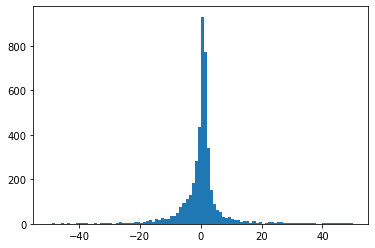

In [149]:
#plot errors for nonzero values
errors = [y_test.to_numpy()[i] - pred_int[i] for i in range(len(pred_int)) if y_test.to_numpy()[i] != 0]
plt.hist(errors, bins = 100, range = (-50, 50))
plt.show()

In [150]:
pd.Series(errors).describe()

count    4499.000000
mean        3.997333
std        49.064136
min      -161.000000
25%        -2.000000
50%         0.000000
75%         1.000000
max      1712.000000
dtype: float64

In [151]:
import shap
shap.initjs()

In [152]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_small)

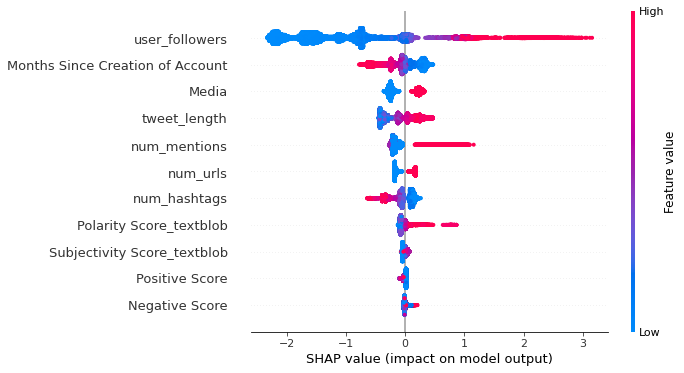

In [153]:
shap.summary_plot(shap_values, X_small)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


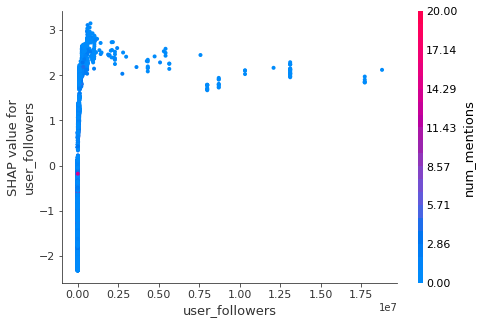

In [177]:
shap.dependence_plot("user_followers", shap_values, X_small, xmin = None, xmax = None)

## Boosted tree, tweedie regression, tf-idf dataset

In [187]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [188]:
params = {"objective":"reg:tweedie",'colsample_bytree': 1.0, 'learning_rate': 0.01,'gamma':1.5,'max_depth': 2,
 'subsample':0.6, 'reg_alpha': 0,'reg_lambda':1,'min_child_weight':5, 'tweedie_variance_power':1.5}

In [189]:
t0 = time.time()
bst = xgb.train(params, dtrain, num_boost_round = 1000)
t1 = time.time()
print(round(t1-t0))

298


In [190]:
print(np.sqrt(mean_squared_error(y_test, bst.predict(dtest))))
print(np.sqrt(mean_squared_error(y_train, bst.predict(dtrain))))

31.48882965693272
27.429405692224634


In [191]:
preds = bst.predict(dtest)
pred_int = pd.Series(preds.round().astype(int)).to_numpy()
#0-1 accuracy is not bad
sum(pred_int == y_test.to_numpy())/len(pred_int)

0.2950833837380109

In [192]:
#accuracy for predicting zeros is not bad either
# numerator: first time of multiply: counts where prediction is correct
# second term of multiply: conditions on having true value of 0
# denominator: number of true 0s
sum(np.multiply((pred_int == y_test.to_numpy()), y_test.to_numpy() == 0))/sum(y_test.to_numpy() == 0)

0.3422391857506361

In [193]:
from sklearn.metrics import mean_tweedie_deviance
mean_tweedie_deviance(y_test, preds, power = 1.5)

5.120954658068519

## Use Shap to explain model

In [328]:
import shap
shap.initjs()

In [329]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

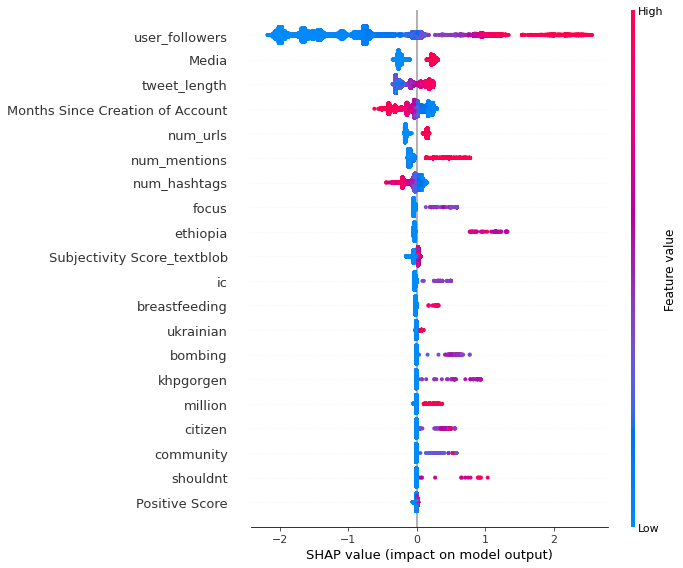

In [331]:
shap.summary_plot(shap_values, X)